# Chirped Z-transform

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['savefig.pad_inches'] = 0.0
mpl.rcParams['figure.subplot.hspace'] = 0
mpl.rcParams['figure.subplot.wspace'] = 0
mpl.rcParams['figure.subplot.left'] = 0.075

## X Scheme

In [4]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z

from diffractio.utils_math import nextpow2
from numpy.fft import fft, ifft

In [5]:
radius = 250*um
xin = np.linspace(-radius, radius, 4096)
wavelength = 550 * nm
z= 2*mm

In [6]:

t0 = Scalar_mask_X(xin, wavelength)
t0.slit(x0=0, size=radius/2)
u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1=t0*u0

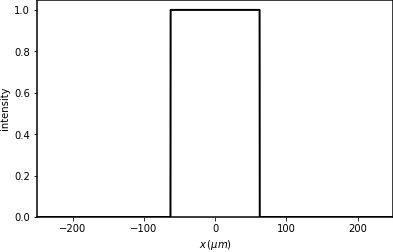

In [7]:
u1.draw()

### to just one data

In [8]:
xout = 0.
z = 2*mm

In [9]:
%%time
u2 = u1.CZT(z, xout)
print(u2)

[0.04131865-0.87270006j]
CPU times: user 927 µs, sys: 1.13 ms, total: 2.06 ms
Wall time: 1.76 ms


### to field_z

In [10]:
xout = 0
z = np.linspace(.5*mm, 10*mm, 1024)

In [11]:
%%time
u2 = u1.CZT(z, xout);

CPU times: user 937 ms, sys: 0 ns, total: 937 ms
Wall time: 944 ms


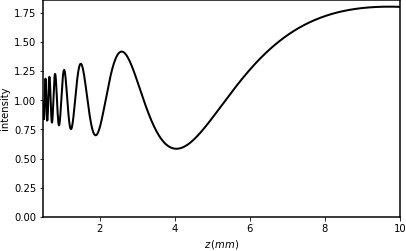

In [12]:
u2.draw(z_scale='mm')

### to field_X

In [13]:
xout = np.linspace(-radius, radius, 256)
z = 2 * mm


In [14]:
%%time
u2 = u1.CZT(z, xout);


CPU times: user 4.32 ms, sys: 271 µs, total: 4.59 ms
Wall time: 4.17 ms


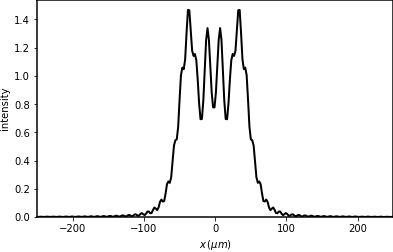

In [15]:
u2.draw()

### to field_XZ

In [16]:
xout = np.linspace(-radius/2, radius/2, 256)
z = np.linspace(1 * mm, 15 * mm, 128)


In [17]:
%%time
u2 = u1.CZT(z, xout);


CPU times: user 471 ms, sys: 0 ns, total: 471 ms
Wall time: 472 ms


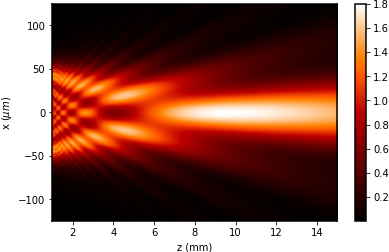

In [18]:
u2.draw(logarithm=0, z_scale='mm')
plt.colorbar();

## XY Scheme

In [19]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z
from diffractio.scalar_fields_X import Scalar_field_X

from diffractio.utils_math import nextpow2
from numpy.fft import fft, ifft

In [20]:
radius = 75
xin = np.linspace(-radius, radius, 256)
yin = np.linspace(-radius, radius, 256)
wavelength = 550 * nm

In [21]:
xout = np.linspace(-radius, radius, 256)
yout = np.linspace(-radius, radius, 256)
z = 1 * mm

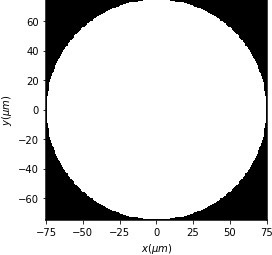

In [23]:
t0 = Scalar_mask_XY(xin, yin, wavelength)
t0.circle(r0=(0, 0), radius=radius)

u0 = Scalar_source_XY(xin, yin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0
u1.draw();

### to data

In [24]:
xout = 0
yout = 0.
z = .5*mm

In [25]:
%%time
u2 = u1.CZT(z, xout, yout); 
print("{}".format(np.abs(u2)**2))

0.9611722556166583
CPU times: user 12 ms, sys: 7.96 ms, total: 19.9 ms
Wall time: 19.2 ms


### to field_X

In [26]:
xout = np.linspace(-radius, radius, 512)
yout = 0.
z = .5 * mm

CPU times: user 52.9 ms, sys: 0 ns, total: 52.9 ms
Wall time: 52.2 ms


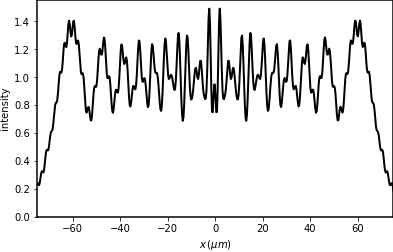

In [27]:
%%time
u2 = u1.CZT(z, xout, yout); 
u2.draw()

### to field_XY


In [28]:
xout = np.linspace(-radius, radius, 256)
yout = np.linspace(-radius, radius, 256)
z = .25 * mm

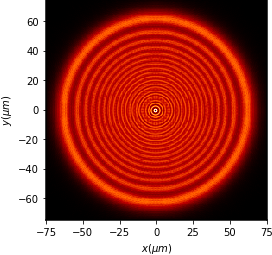

In [29]:
u2 = u1.CZT(z, xout, yout);
u2.draw();

### to field_Z

In [31]:
xout = -1.
yout = 0.
z = np.linspace(0.25*mm, 1*mm, 256)

CPU times: user 2.07 s, sys: 0 ns, total: 2.07 s
Wall time: 2.07 s


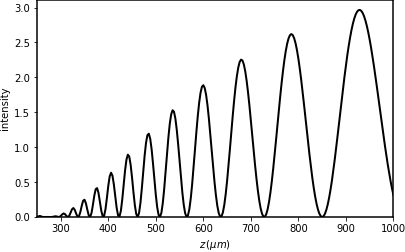

In [32]:
%%time
u2 = u1.CZT(z, xout, yout); 
u2.draw();


### to field_XZ

In [37]:
xout = np.linspace(-radius, radius, 256)
yout = 0.
z = np.linspace(0.25 * mm, 1 * mm, 128)

CPU times: user 1.42 s, sys: 10.3 ms, total: 1.43 s
Wall time: 1.43 s


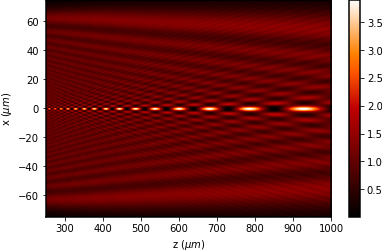

In [40]:
%%time
u2 = u1.CZT(z, xout, yout); 
u2.draw();
plt.colorbar();

### to field_XYZ

In [41]:
xout = np.linspace(-radius, radius, 128)
yout = np.linspace(-radius, radius, 128)
z = np.linspace(0.25 * mm, 3* mm, 256)

In [42]:
%%time
u2 = u1.CZT(z, xout, yout); 

CPU times: user 2.72 s, sys: 623 ms, total: 3.34 s
Wall time: 3.34 s


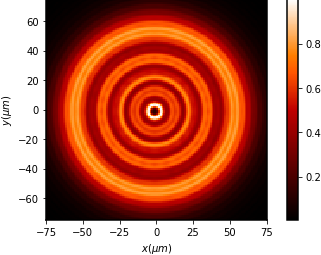

In [43]:
u2.draw_XY(z0=1*mm)
plt.colorbar();

<Figure size 432x288 with 0 Axes>

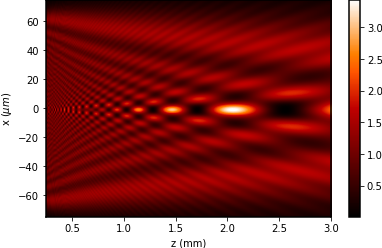

In [45]:
u2.draw_XZ(y0=0, logarithm=0, z_scale='mm')
plt.colorbar();

## CZT for reducing the output size

Chirped z-Transform algorithm is specially indicated for cases where the output field is much smaller than the input field, as you can choose the position and sampling of the field. An important example for this is the focusing of a lens.

### X scheme

In [55]:
radius = 3*mm
xin = np.linspace(-radius, radius, 4096)
wavelength = 550 * nm
focal = 250 * mm

In [47]:

t0 = Scalar_mask_X(xin, wavelength)
t0.lens(x0=0, focal=focal, radius=radius)

u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1=t0*u0

In [48]:
xout = 0.
z = np.linspace(focal-30*mm, focal+30*mm, 128)

CPU times: user 274 ms, sys: 4.16 ms, total: 278 ms
Wall time: 277 ms


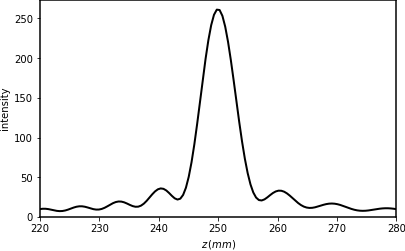

In [49]:
%%time
u2 = u1.CZT(z, xout)
u2.draw(z_scale='mm');

In [50]:
xout = np.linspace(-150 * um, 150 * um, 256)
z = focal

CPU times: user 25 ms, sys: 301 µs, total: 25.3 ms
Wall time: 24.1 ms


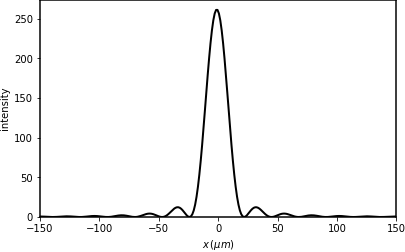

In [51]:
%%time
u2 = u1.CZT(focal, xout)
u2.draw();

In [52]:
xout = np.linspace(-150 * um, 150 * um, 128)
z = np.linspace(focal-20*mm, focal+20*mm, 128)

CPU times: user 480 ms, sys: 0 ns, total: 480 ms
Wall time: 479 ms


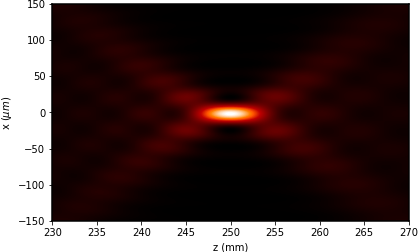

In [53]:
%%time
u2 = u1.CZT(z, xout);
u2.draw(logarithm=0, z_scale='mm')

### XY scheme

In [56]:
radius = 2 * mm
xin = np.linspace(-radius, radius, 512)
yin = np.linspace(-radius, radius, 512)
wavelength = 550 * nm
focal = 500 * mm

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f0b4cc2c4c0>)

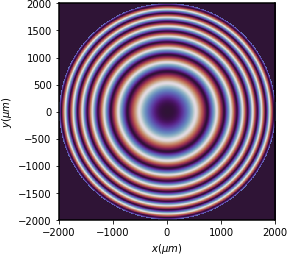

In [58]:
t0 = Scalar_mask_XY(xin, yin, wavelength)
t0.lens(r0=(0, 0), focal=focal, radius=radius)

u0 = Scalar_source_XY(xin, yin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0
u1.draw('phase')

In [59]:
xout = np.linspace(-150 * um, 150 * um, 128)
yout = np.linspace(-150 * um, 150 * um, 128)
z = focal

CPU times: user 90.2 ms, sys: 60.6 ms, total: 151 ms
Wall time: 101 ms


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f0b58e22110>)

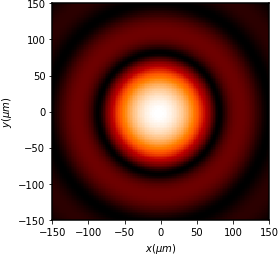

In [61]:
%%time
u2 = u1.CZT(z, xout, yout); 
u2.draw(logarithm=1e-1);
